# Process and plot Pu-240 xs covariance matrix with cross terms

In [1]:
import sandy

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [17]:
# ERRORR parameters
ek_errorr = sandy.energy_grids.ECCO33  # 33 group energy structure
err = 0.1  # RECONR recostruction tolerance, low for fast calculations
mt = [18, 102]  # select only fission and capture

## JEFF-3.3

In [13]:
errorr = sandy.get_endf6_file("jeff_33", "xs", 942400).get_errorr(err=err, ek_errorr=ek_errorr, mt=mt, verbose=True)
cov = errorr.get_cov()

moder
20 -21 /
reconr
-21 -22 /
'sandy runs njoy'/
9440 0 0 /
0.1 0. /
0/
errorr
-21 -22 0 33 0 /
9440 1 2 0 1 /
0 0.0 /
1 33 1/
2 0 /
18 102 /
33 /
1.00001e-05 1.00000e-01 5.40000e-01 4.00000e+00 8.31529e+00 1.37096e+01 2.26033e+01 4.01690e+01 6.79040e+01 9.16609e+01 1.48625e+02 3.04325e+02 4.53999e+02 7.48518e+02 1.23410e+03 2.03468e+03 3.35463e+03 5.53084e+03 9.11882e+03 1.50344e+04 2.47875e+04 4.08677e+04 6.73795e+04 1.11090e+05 1.83156e+05 3.01974e+05 4.97871e+05 8.20850e+05 1.35335e+06 2.23130e+06 3.67879e+06 6.06531e+06 1.00000e+07 1.96403e+07 /
stop


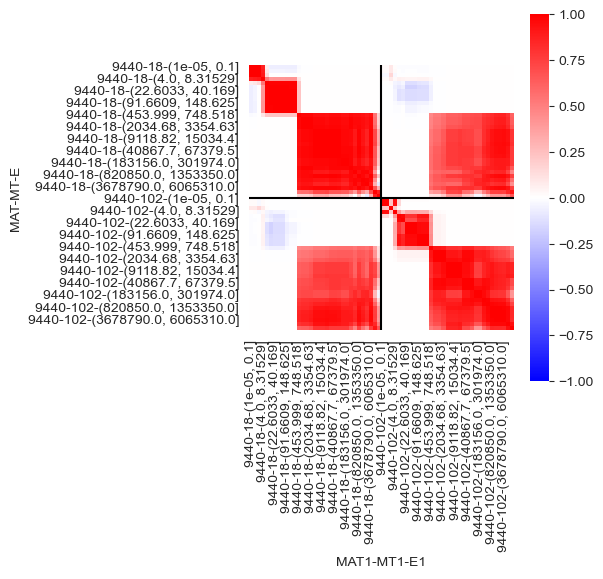

In [18]:
fig, ax = plt.subplots(figsize=(8, 8), dpi=100)
ax.set_aspect("equal")
sns.heatmap(cov.get_corr().data, cmap="bwr", vmin=-1, vmax=1)
ax.axhline(33, color='k')
ax.axvline(33, color='k')
fig.tight_layout()

## ENDF/B-VIII.0

In [22]:
errorr = sandy.get_endf6_file("endfb_80", "xs", 942400).get_errorr(
    err=err,
    ek_errorr=ek_errorr,
    mt=mt,
    irespr=0,  # faster handling of resonance parameters
    nubar=False,  # skip nubar
    chi=False,  # skip chi
    verbose=True,
)
cov = errorr.get_cov()

moder
20 -21 /
reconr
-21 -22 /
'sandy runs njoy'/
9440 0 0 /
0.1 0. /
0/
errorr
-21 -22 0 33 0 /
9440 1 2 0 1 /
0 0.0 /
1 33 0/
2 0 /
18 102 /
33 /
1.00001e-05 1.00000e-01 5.40000e-01 4.00000e+00 8.31529e+00 1.37096e+01 2.26033e+01 4.01690e+01 6.79040e+01 9.16609e+01 1.48625e+02 3.04325e+02 4.53999e+02 7.48518e+02 1.23410e+03 2.03468e+03 3.35463e+03 5.53084e+03 9.11882e+03 1.50344e+04 2.47875e+04 4.08677e+04 6.73795e+04 1.11090e+05 1.83156e+05 3.01974e+05 4.97871e+05 8.20850e+05 1.35335e+06 2.23130e+06 3.67879e+06 6.06531e+06 1.00000e+07 1.96403e+07 /
stop


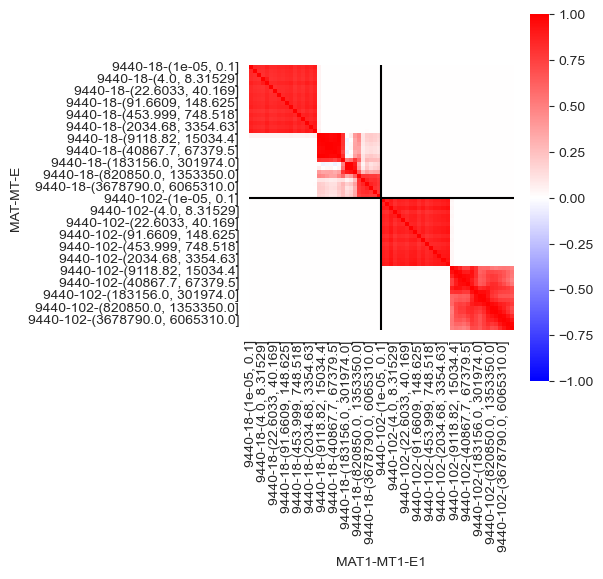

In [23]:
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
ax.set_aspect("equal")
sns.heatmap(cov.get_corr().data, cmap="bwr", vmin=-1, vmax=1)
ax.axhline(33, color='k')
ax.axvline(33, color='k')
fig.tight_layout()